<a href="https://colab.research.google.com/github/FirstSnake/skills-introduction-to-github/blob/main/IMBD_sentiment_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).
<table align="center">
 <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ezponda/intro_deep_learning/blob/main/class/Fundamentals/IMBD_sentiment_binary_classification.ipynb">
        <img src="https://colab.research.google.com/img/colab_favicon_256px.png"  width="50" height="50" style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/ezponda/intro_deep_learning/blob/main/class/Fundamentals/IMBD_sentiment_binary_classification.ipynb">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png"  width="50" height="50" style="padding-bottom:5px;" />View Source on GitHub</a></td>
</table>

# Classification Example
 Two-class classification, or binary classification, may be the most widely applied kind of machine-learning problem. In this example, you’ll learn to classify movie reviews as positive or negative, based on the text content of the reviews.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
tf.random.set_seed(0)

In [2]:
pip install tensorflow


  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.0.1-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
   ---------------------------

## The Dataset: The IMDB dataset
We’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews. The  parameter `num_words` controls how many words different we want to use.

In [1]:
from tensorflow.keras.datasets import imdb
num_words = 5000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
print(train_data[0])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [3]:
# Transform word_id to word and reverse
word2int = imdb.get_word_index()
word2int = {w: i+3 for w, i in word2int.items()}
word2int["<PAD>"] = 0
word2int["<START>"] = 1
word2int["<UNK>"] = 2
word2int["<UNUSED>"] = 3
int2word = {i: w for w, i in word2int.items()}
num_words = num_words+3

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


For transforming an id-sequence to a phrase use get_words

In [4]:
def get_words(sentence, int2word):
    return ' '.join([int2word.get(i,'<UNK>') for i in sentence])
print(get_words(train_data[0], int2word))
print('Sentiment: ', train_labels[0])

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly <UNK> was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little <UNK> that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big <UNK> for the whole film but these children are amazing and should be <UNK> for what they

## Data Preprocessing

You need to convert your raw text to an appropriate input to a sequential model

In [5]:
def vectorize_text_sentence(text, word2int):
    tokens = text.split(' ')
    tokens_id = [word2int.get(tk,2) for tk in tokens]
    return tokens_id

text = get_words(train_data[0], int2word)
print(text)
print(vectorize_text_sentence(text, word2int))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly <UNK> was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little <UNK> that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big <UNK> for the whole film but these children are amazing and should be <UNK> for what they

### Bag of Words Model BoW
We are going to use a bag of words model. BoW is a simplifying representation used in natural language processing. In this model, a text (such as a sentence or a document) is represented as the Each key is the word, and each value is the frequency of occurrences of that word in the given text document.

- **Input document**: `"John likes to watch movies Mary likes movies too"`
- **BoW**: `{'John': 1, 'likes': 2, 'to': 1, 'watch': 1, 'movies': 2, 'Mary': 1, 'too': 1}`
- **BoW Normalized**: `{'John': 0.11, 'likes': 0.22, 'to': 0.11, 'watch': 0.11, 'movies': 0.22, 'Mary': 0.11, 'too': 0.11}`


In [6]:
from collections import Counter

def get_bag_of_words(sequence, norm=True):
    word_count = Counter(sequence)
    if norm:
        total = sum(word_count.values())
        word_freq = {w: n / total for w, n in word_count.items()}
        return word_freq
    else:
        return dict(word_count.items())

text_example = "John likes to watch movies Mary likes movies too"
print('text_example', text_example)
text_sequence = text_example.split()
print('text splitted', text_sequence)
bag_of_words = get_bag_of_words(text_sequence)
print('bag_of_words', bag_of_words)
print('bag_of_words norm=False', get_bag_of_words(text_sequence, norm=False))
print(
    'bag_of_words with indexes', {
        word2int[w.lower()]: p
        for w, p in get_bag_of_words(text_sequence, norm=False).items()
    })

text_example John likes to watch movies Mary likes movies too
text splitted ['John', 'likes', 'to', 'watch', 'movies', 'Mary', 'likes', 'movies', 'too']
bag_of_words {'John': 0.1111111111111111, 'likes': 0.2222222222222222, 'to': 0.1111111111111111, 'watch': 0.1111111111111111, 'movies': 0.2222222222222222, 'Mary': 0.1111111111111111, 'too': 0.1111111111111111}
bag_of_words norm=False {'John': 1, 'likes': 2, 'to': 1, 'watch': 1, 'movies': 2, 'Mary': 1, 'too': 1}
bag_of_words with indexes {308: 1, 1232: 2, 8: 1, 106: 1, 102: 2, 1083: 1, 99: 1}


### Document Term Matrix

We need a way to model the documents so that they are all the same length, so that we can use a neural network. For this we are going to use the document term matrix.
- Every document is a vector with the dimension of the vocabulary.
- The position i of the vector corresponds to the word with index i.
- The vector is all zeros except for the BoW word positions, which are filled with the frequency of the corresponding word.


For example:

- D1 = "I like movies",  `{'I': 1, 'like': 1, 'movies': 1}`

- D2 = "I dislike movies",  `{'I': 1, 'dislike': 1, 'movies': 1}`

Then the document-term matrix would be:



   | Doc| I  | like    | dislike   | movies   |
|---:|:-------------|:-----------|:------|:------|
| D1 | 1  | 1       | 0   | 1     |
| D2 | 1  | 0    | 1   | 1     |

$D1 = [1,1,0,1]$

$D2 = [1,0,1,1]$

We convert every BoW to a vector of `dim=num_words` with `vectorize_sequences`

In [7]:
def vectorize_sequence(sequence, num_words, norm=True):
    vec = np.zeros(num_words)
    bow = get_bag_of_words(sequence, norm)
    for w, freq in bow.items():
        if w < num_words:
            vec[w] = freq
    return vec


def vectorize_sequences(sequences, num_words=num_words, norm=True):
    """Creates an all-zero matrix of shape (len(sequences), num_words)"""
    results = np.zeros((len(sequences), num_words))
    for i, sequence in enumerate(sequences):
        results[i, :] = vectorize_sequence(sequence, num_words, norm)
    return results


x_train = vectorize_sequences(train_data, num_words=num_words)
x_test = vectorize_sequences(test_data, num_words=num_words)
y_train =np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
x_train.shape, y_train.shape

((25000, 5003), (25000,))

## Define and train a model

Define, compile and fit your NN model

1. You can use the [Functional API](https://keras.io/guides/functional_api/):

You need to start with an input data entry:
```python    
    inputs = keras.Input(shape=(8,))
    layer_1 = layers.Dense(...)(inputs)
```

and the network outputs:
```python
outputs = layers.Dense(...)(previous_layer)
model = keras.Model(inputs=inputs, outputs=outputs)
```

2. Or you can use [Sequential API](https://keras.io/guides/sequential_model/)

```python
model = keras.Sequential(name='example_model')
model.add(layers.Dense(..., input_shape=(8,))
model.add(...
```

You can introduce regularization methods seen in [Prevent_Overfitting.ipynb](https://github.com/ezponda/intro_deep_learning/blob/main/class/Fundamentals/Prevent_Overfitting.ipynb) like [Dropout layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout):


```python
tf.keras.layers.Dropout(
    rate, noise_shape=None, seed=None, **kwargs
)
```

With Functional API:
```python
next_layer = layers.Dropout(0.4)(prev_layer)
```
With Sequential:
```python
model.add(layers.Dropout(0.4))
```

First try with only one hidden layer and see the results.

In [12]:
model = ...

In [20]:
# Preparar datos sin normalizar
x_train = vectorize_sequences(train_data, num_words=num_words, norm=False)
x_test = vectorize_sequences(test_data, num_words=num_words, norm=False)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(f'x_train shape: {x_train.shape}, x_test shape: {x_test.shape}')

# Función para construir el modelo con hiperparámetros ajustables
def build_model(hp):
    model = keras.Sequential()

    # Tune número de capas ocultas (1 a 4)
    for i in range(hp.Int('num_layers', min_value=1, max_value=4)):
        # Tune número de unidades por capa (16 a 512, pasos de 32)
        units = hp.Int(f'units_{i}', min_value=16, max_value=512, step=32)
        model.add(layers.Dense(
            units=units,
            activation='relu',
            kernel_regularizer=keras.regularizers.l2(hp.Float(f'l2_{i}', min_value=1e-4, max_value=1e-2, sampling='log'))
        ))

        # Tune tasa de dropout (0.0 a 0.4, pasos de 0.1)
        dropout_rate = hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.4, step=0.1)
        model.add(layers.Dropout(rate=dropout_rate))

    # Capa de salida
    model.add(layers.Dense(1, activation='sigmoid'))

    # Tune tasa de aprendizaje para Adam
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Configurar el tuner con Hyperband
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    hyperband_iterations=3,
    directory='imdb_tuning_v3',
    project_name='sentiment_classification'
)

# Callback para EarlyStopping
stop_early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,  # Más paciencia
    restore_best_weights=True,
    verbose=1
)

# Ejecutar la búsqueda de hiperparámetros
tuner.search(
    x_train,
    y_train,
    epochs=20,
    validation_split=0.25,
    batch_size=32,
    callbacks=[stop_early],
    verbose=1
)

# Obtener los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nMejores hiperparámetros encontrados:")
print(f"Número de capas ocultas: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Capa {i+1}: {best_hps.get(f'units_{i}')} unidades, Dropout: {best_hps.get(f'dropout_{i}')}, L2: {best_hps.get(f'l2_{i}')}")
print(f"Tasa de aprendizaje: {best_hps.get('learning_rate')}")

Trial 90 Complete [00h 01m 17s]
val_accuracy: 0.888159990310669

Best val_accuracy So Far: 0.8912000060081482
Total elapsed time: 00h 29m 13s

Mejores hiperparámetros encontrados:
Número de capas ocultas: 1
Capa 1: 48 unidades, Dropout: 0.4, L2: 0.00014019410557845397
Tasa de aprendizaje: 0.00011334414085900249


In [22]:
# Construir y entrenar el modelo con los mejores hiperparámetros
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    validation_split=0.25,
    batch_size=32,
    callbacks=[stop_early],
    verbose=1
)

# Evaluar en el conjunto de prueba
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Epoch 1/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6247 - loss: 0.6662 - val_accuracy: 0.8448 - val_loss: 0.4417
Epoch 2/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8369 - loss: 0.4298 - val_accuracy: 0.8720 - val_loss: 0.3541
Epoch 3/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8738 - loss: 0.3458 - val_accuracy: 0.8797 - val_loss: 0.3281
Epoch 4/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8955 - loss: 0.2965 - val_accuracy: 0.8864 - val_loss: 0.3087
Epoch 5/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9071 - loss: 0.2684 - val_accuracy: 0.8877 - val_loss: 0.3025
Epoch 6/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9169 - loss: 0.2478 - val_accuracy: 0.8893 - val_loss: 0.2973
Epoch 7/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9239 - loss: 0.2282 - val_accuracy: 0.8878 - val_loss: 0.2955
Epoch 8/20
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9298 - loss: 0.2145 - val_accuracy: 0.

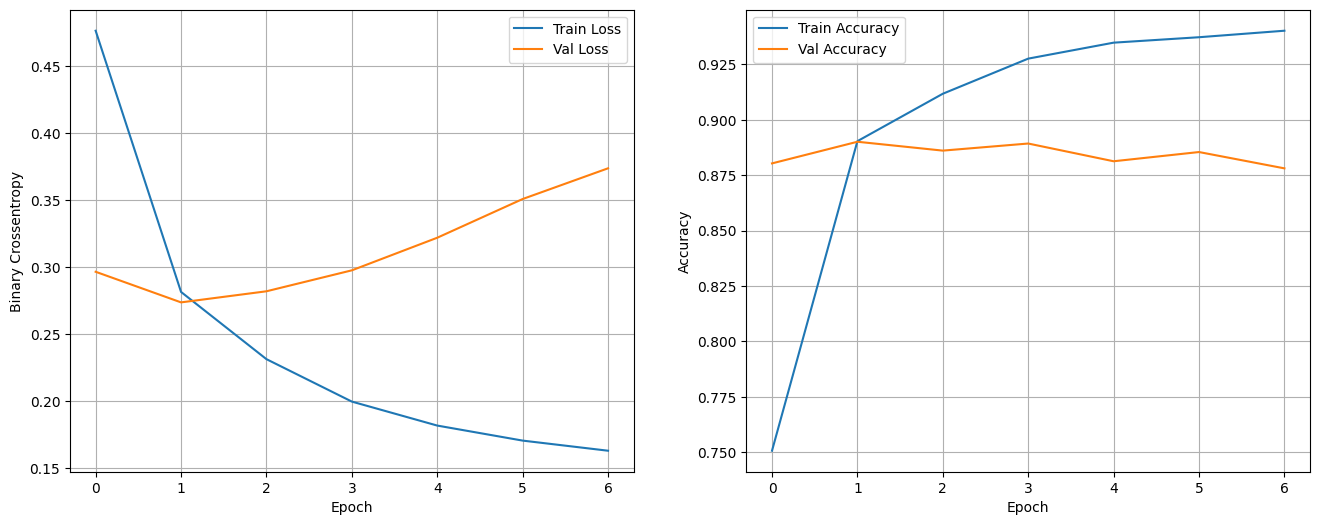

In [21]:
# Visualización de resultados
import matplotlib.pyplot as plt
import pandas as pd

def show_loss_accuracy_evolution(hist):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.plot(hist['epoch'], hist['loss'], label='Train Loss')
    ax1.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
    ax1.grid()
    ax1.legend()
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    ax2.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')
    ax2.grid()
    ax2.legend()
    plt.show()

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
show_loss_accuracy_evolution(hist)

### Evaluate the model
You need to obtain a Test Accuracy > 0.85. Try to get more than 0.9!

In [23]:
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.8872 - loss: 0.3046
Test Loss: 0.3025205135345459
Test Accuracy: 0.8861200213432312


In [24]:
def show_errors(x_test, model, labels, int2word, n_samples=10):
    preds = 1.0 * (model.predict(x_test).flatten() > 0.5)
    bad_pred_inds = np.where(preds != labels)[0]
    n_samples = min(len(bad_pred_inds), n_samples)
    samples_inds = np.random.choice(bad_pred_inds, n_samples)
    for ind in samples_inds:
        print('Predicted : {0}, real : {1}, lenght: {2}'.format(
            int(preds[ind]), labels[ind], len(test_data[ind])))
        print(get_words(test_data[ind], int2word))
        print()
    return

show_errors(x_test, model, y_test, int2word, n_samples=10)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
Predicted : 1, real : 0.0, lenght: 196
<START> matt is a loyal communist in a <UNK> steel mill who works to <UNK> workers into the party even though this <UNK> himself from his son family and neighbors what makes this even more difficult is that is actually an fbi agent <UNK> as a communist in order to <UNK> information about party activities the party is trying to create a strike at the mill <UNK> the pro strike movement will lead the workers into a wave of propaganda also has to <UNK> with beautiful eve a party member and teacher at his <UNK> school who finds the fact that is a double agent when eve learns the ugly truth about the <UNK> real motives the <UNK> decide she must be <UNK> and must aid her without <UNK> himself the film should have plenty of suspense and double <UNK> but there is very little in this film but by today's standards very cheesy propaganda and little action or thrills <UNK> is very good in the main role but even he and

### Making predictioins with new data

In [25]:
reviews = ['the film was really bad and i am very disappointed',
           'The film was very funny entertaining and good we had a great time . brilliant film',
           'this film was just brilliant',
           'the movie is not bad',
           'the movie is not bad I like it'
]
sequences = [vectorize_text_sentence(review.lower(), word2int)
             for review in reviews]

x_pred = vectorize_sequences(sequences, num_words=num_words)
predictions = model.predict(x_pred)
for review, pred in zip(reviews, predictions.flatten()):
    print()
    print(review)
    print('Sentiment: ', np.round(pred, 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

the film was really bad and i am very disappointed
Sentiment:  0.46

The film was very funny entertaining and good we had a great time . brilliant film
Sentiment:  0.52

this film was just brilliant
Sentiment:  0.5

the movie is not bad
Sentiment:  0.45

the movie is not bad I like it
Sentiment:  0.47


In [26]:
1.0*(model.predict(x_pred) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.],
       [1.],
       [0.],
       [0.],
       [0.]])

### Question 1: Repeat the process with unnormalized bag of words, compare results

In [27]:
x_train = vectorize_sequences(train_data, num_words=num_words, norm=False)
x_test = vectorize_sequences(test_data, num_words=num_words, norm=False)
y_train =np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
x_train.shape, y_train.shape

((25000, 5003), (25000,))

In [ ]:
model = ...

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history = model.fit(x_train, y_train, validation_split=0.25, epochs= 10, batch_size=32)
show_loss_accuracy_evolution(hist)
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

### Question 2: What happens if you reduce the size of the vocabulary `num_words`, compare results

In [ ]:
num_words = ...
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
print(train_data[0])

word2int = imdb.get_word_index()
word2int = {w: i+3 for w, i in word2int.items()}
word2int["<PAD>"] = 0
word2int["<START>"] = 1
word2int["<UNK>"] = 2
word2int["<UNUSED>"] = 3
int2word = {i: w for w, i in word2int.items()}
num_words = num_words+3

x_train = vectorize_sequences(train_data, num_words=num_words)
x_test = vectorize_sequences(test_data, num_words=num_words)
y_train =np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
x_train.shape, y_train.shape

In [ ]:
model = ...

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history = model.fit(x_train, y_train, validation_split=0.25, epochs= 10, batch_size=32)
show_loss_accuracy_evolution(hist)
results = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

In [ ]:
reviews = [
    'the film was really bad and i am very disappointed',
    'The film was very funny entertaining and good we had a great time . brilliant film',
    'this film was just brilliant', 'the movie is not bad',
    'the movie is not bad I like it'
]
sequences = [
    vectorize_text_sentence(review.lower(), word2int) for review in reviews
]

x_pred = vectorize_sequences(sequences, num_words=num_words)
predictions = model.predict(x_pred)
for review, pred in zip(reviews, predictions.flatten()):
    print()
    print(review)
    print('Sentiment: ', np.round(pred, 2))

### Compare with other ML algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()
clr.fit(x_train, y_train)
val_acc = clr.score(x_test, y_test)
print('Test Accuracy: {}'.format(val_acc))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5, n_jobs=-1)
rfc.fit(x_train, y_train)
val_acc = rfc.score(x_test, y_test)
print('Test Accuracy: {}'.format(val_acc))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(x_train, y_train)
val_acc = rfc.score(x_test, y_test)
print('Test Accuracy: {}'.format(val_acc))

In [ ]:
reviews = []
# training reviews
for ind in range(len(train_data)):
    sentence = train_data[ind]
    sentence_text = get_words(train_data[ind], int2word)
    reviews.append(sentence_text)
print('First training review: ', reviews[0])